In [1]:
import pandas as pd
import numpy as np
import re
import warnings

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
tweets = pd.read_csv('tweets_all.csv',encoding="ISO-8859-1")

In [3]:
tweets.head(5)

,Unnamed: 0,text,retweet_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,...,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
0,7,Good morning. \r\n#njspots #toxictins #njshoot...,0,False,False,806435522684063744,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,Wed Dec 07 09:49:46 +0000 2016,...,city,"Mercerville, NJ",NaN,NaN,40.227928,-74.703982,40.236494,-74.717857,http://fb.me/1vMVgkYg7,https://t.co/q7R11FO1eU
1,15,@DinaPugliese Good morning Dina :) Have a terr...,0,False,False,806435535132721152,DinaPugliese,"<a href=""http://twitter.com/download/android"" ...",False,Wed Dec 07 09:49:49 +0000 2016,...,city,"Cochrane, Ontario",NaN,NaN,49.145331,-81.073921,NaN,NaN,NaN,NaN
2,18,#good morning everyone. https://t.co/u6W1jI4tKz,0,False,False,806435538928594944,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Wed Dec 07 09:49:49 +0000 2016,...,city,"Lawrence, IN",NaN,NaN,39.870397,-85.996819,NaN,NaN,NaN,NaN
3,21,@monieke71 @SomenHalder6 good morning my friends,0,False,False,806435547338178560,monieke71,"<a href=""http://twitter.com/download/android"" ...",False,Wed Dec 07 09:49:51 +0000 2016,...,city,"Combs-la-Ville, France",NaN,NaN,48.660176,2.576654,NaN,NaN,NaN,NaN
4,33,"Good morning Abuja,it breakfast time @pastry &...",0,False,False,806435582482247682,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,Wed Dec 07 09:50:00 +0000 2016,...,admin,"Federal Capital Territory, Nigeria",NaN,NaN,8.942483,7.253046,NaN,NaN,NaN,NaN


In [4]:
#processo de del RT @

tweets['tweetos'] = ''

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
        
    except AttributeError:
        tweets['tweetos'][i] = 'other'
        
#Pre processo tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i] == False:
        tweets['tweetos'][i] = 'other'
        
#remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                 if 'http' not in word and '@' not in word and '<' not in word ])
    

tweets['text'][1]

'Good morning Dina :) Have a terrific hump day! :) Little snowy in Cochrane today.'

In [5]:
#removendo pontuações e espaços duplos
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][1]

'good morning dina have a terrific hump day little snowy in cochrane today'

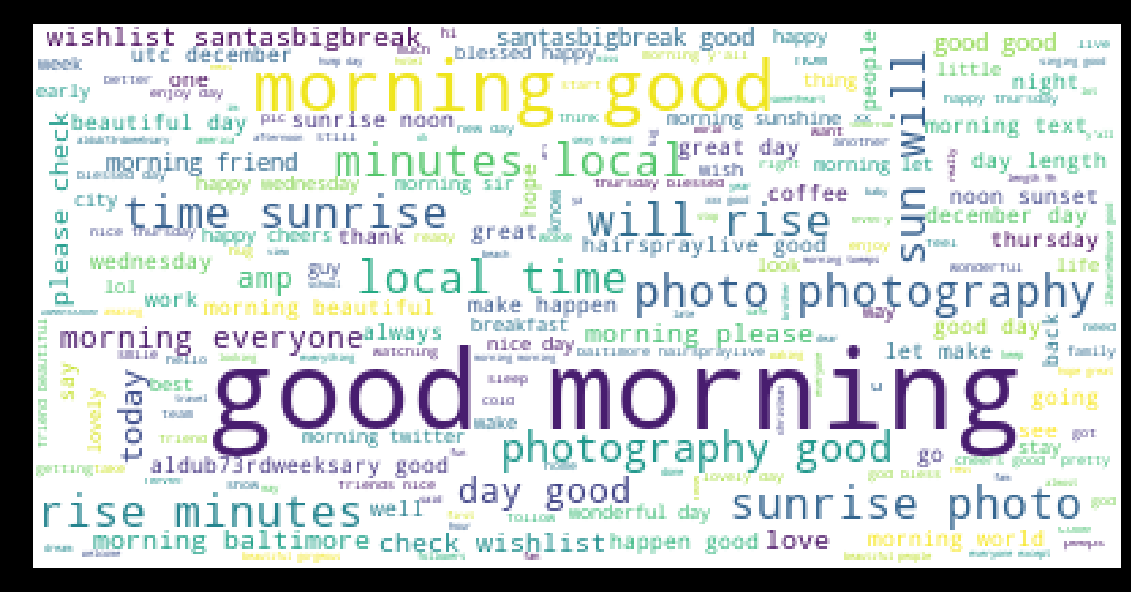

In [6]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
wordcloud(tweets,'text')